In [50]:
# importamos librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop, Adam

import pandas as pd

In [51]:
# esta función nos va a servir para ver la historia de la red
# como ha ido cambiando el loss y el accuracy

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['loss'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['accuracy'],'b',
           label = 'accuracy')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()

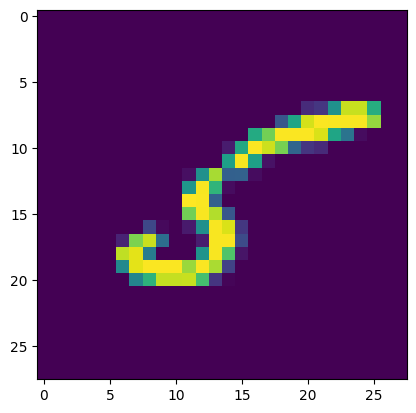

In [52]:
# Los datos ya estan incorporados en Keras, los cargamos con esta función
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# visualizamos la imagen 8
plt.imshow(x_train[11])
plt.show()

In [53]:
# guardamos las dimensiones en variables para hacer la red mas generica
# y reutilizable

ntrain = x_train.shape[0]
ntest  = x_test.shape[0]
dimf = x_train.shape[1]
dimc = x_train.shape[2]

print("dimensiones: ", ntrain, ntest, dimf, dimc)

dimensiones:  60000 10000 28 28


In [54]:
# Preprocesamos los datos vectorizando y normalizando las imagenes

x_train = x_train.astype('float32')/255.
x_train = x_train.reshape(ntrain, dimf*dimc)

x_test = x_test.astype('float32')/255.
x_test = x_test.reshape(ntest, dimf*dimc)

# comprobamos que la dimension de x es correcta
print(x_train.shape)

(60000, 784)


In [55]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [56]:
# Especificamos el modelo
# Una unica capa oculta con 10 sigmoides
# Una capa de salida con 10 softmax, una para cada categoria

model = keras.Sequential()
model.add(Input(shape=(dimf*dimc,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# compilamos el modelo
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", # stochastic gradient descent
              metrics= ['accuracy'])

In [65]:
# compilamos el modelo con RMSprop

optimizer = RMSprop(learning_rate=0.001)

model.compile(loss="categorical_crossentropy",
              optimizer= optimizer,
              metrics= ['accuracy'])

In [ ]:
# En lugar de RMSprop vamos a utilizar Adam (omitir si se usa RMSprop)

optimizer = Adam(learning_rate=0.001)

model.compile(loss="categorical_crossentropy",
              optimizer= optimizer,
              metrics= ['accuracy'])

In [70]:
# hacemos el entrenamiento
history = model.fit(x_train, y_train, epochs=100,  batch_size=1000)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1640
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.1636
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9521 - loss: 0.1698
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9536 - loss: 0.1632
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9532 - loss: 0.1637
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9535 - loss: 0.1642
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9531 - loss: 0.1657
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9551 - loss: 0.1590
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9536 - loss: 0.1651
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1606
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9530 - loss: 0.1642
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

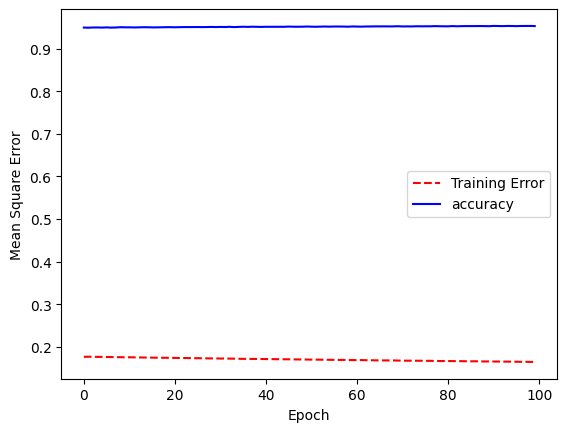

In [69]:
# hacemos un plot para ver si aprende adecuadamente
plot_history(history)

In [71]:
# evaluacion final con el test_set

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.9287 - loss: 0.2511
test accuracy:  0.9376000165939331


In [72]:
yp = model.predict(x_test)

print(yp[11])
print(np.argmax(yp[11]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
[1.5318126e-04 5.0471243e-07 1.9900419e-03 3.0472795e-06 1.2758933e-04
 3.6010642e-05 9.9766445e-01 9.0603551e-09 1.5989901e-05 9.1736492e-06]
6
